# Introduction

About Dataset
Context
The dataset was created because there were no freely available Harumanis Mango physical datasets such as weight, length and circumference.

Content
This dataset contains 105 tabular physical measurement data of Harumanis Mango (clone number MA 128) collected from the Fruit Collection Center, FAMA Perlis, Malaysia.

You can refer to the paper in IEEEXplore titled "Grading of Mango Fruit Based on Physical Measurements" for more information.

Inspiration
Grading of Mango Fruit with classification ML

License and Copyright
Copyright 2021 (c) Mohammad Hafiz Ismail, Tajul Rosli Razak, Ray Adderley JM Gining, & Mohd Nazuan Wagimin

This dataset is licensed under Attribution-ShareAlike 4.0 International (CC BY-SA 4.0).
You can use the dataset in your work, research, study, etc. Provided that you cite/attribute the dataset properly

Citation:
M. N. Wagimin, M. H. Ismail, S. S. M. Fauzi and N. A. M. Zaki, "Grading of Mango Fruits Based on Physical Measurements," 2022 3rd International Conference on Artificial Intelligence and Data Sciences (AiDAS), IPOH, Malaysia, 2022, pp. 115-119, doi: 10.1109/AiDAS56890.2022.9918732.

Cite this dataset as:
Mohammad Hafiz Ismail, Tajul Rosli Razak, Ray Adderley JM Gining, & Mohd Nazuan Wagimin. (2022). Harumanis Mango Physical Measurements [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2366811

# Problem Statement

Based on provided physical measurements, can we classify and predict the harumanis mango?

# Data

Data is retrived from: https://www.kaggle.com/datasets/mohdnazuan/harumanis-mango-physical-measurement?select=data-2023-01-18.csv



# Features

Data dictionary: 

The data features:

* Weight : The weight of the mango in gram (g)
* Length : The length of the mango in centimeter (cm)
* Circumference: The circumference of the mango in centimeter (cm)



The data target:

* Grade : The mango grade classify by class A or B

## Preparing some tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('harumanis_data.csv')

# display first 10 data
df.head(10)

,No,Weight,Length,Circumference,Grade
0,1,486.5,14.0,27.0,A
1,2,388.4,12.0,26.0,A
2,3,493.7,12.0,26.5,A
3,4,342.5,10.0,24.3,A
4,5,401.5,11.0,25.0,A
5,6,342.4,12.5,24.0,A
6,7,338.4,12.5,24.0,A
7,8,387.9,12.4,26.2,A
8,9,451.7,13.4,27.3,A
9,10,349.5,12.0,24.6,A


## Data Profilling

1. .info
2. .isna().sum()
3. .dtypes
4. .shape
5. .size
6. .describe()
7. .duplicated().sum()
8. .describe()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             105 non-null    int64  
 1   Weight         105 non-null    float64
 2   Length         105 non-null    float64
 3   Circumference  105 non-null    float64
 4   Grade          105 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.2+ KB


In [4]:
df.isna().sum()

No               0
Weight           0
Length           0
Circumference    0
Grade            0
dtype: int64

In [5]:
df.dtypes

No                 int64
Weight           float64
Length           float64
Circumference    float64
Grade             object
dtype: object

In [6]:
df.shape

(105, 5)

In [7]:
df.size

525

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,No,Weight,Length,Circumference
count,105.000000,105.000000,105.000000,105.000000
mean,53.000000,351.010476,11.988571,23.820952
std,30.454885,74.172386,1.250486,2.235238
min,1.000000,235.000000,10.000000,20.300000
25%,27.000000,290.500000,10.900000,21.700000
50%,53.000000,341.700000,11.800000,24.000000
75%,79.000000,407.900000,12.800000,25.800000
max,105.000000,571.900000,15.400000,29.900000


# Exploratory data analysis (EDA)

#### Distribution of weight

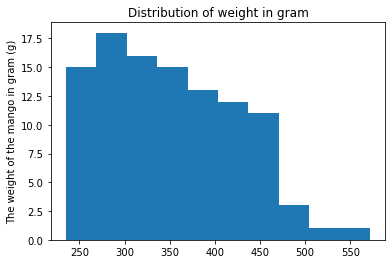

In [10]:
df.Weight.plot(kind='hist')
plt.title('Distribution of weight in gram')
plt.ylabel('The weight of the mango in gram (g)');

#### Distribution of Length

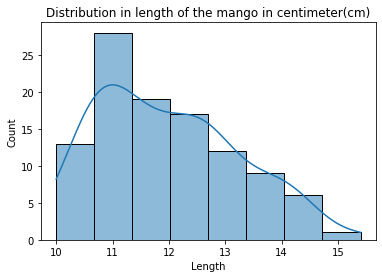

In [11]:
sns.histplot(df.Length,kde='True')
plt.title('Distribution in length of the mango in centimeter(cm)');

#### Distribution of Circumference

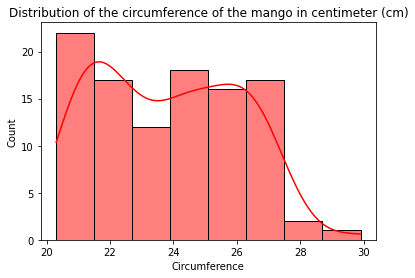

In [12]:
sns.histplot(df.Circumference,kde=True,color='red')
plt.title('Distribution of the circumference of the mango in centimeter (cm)');

#### Frequency of Grade in our dataset

In [13]:
df.Grade.value_counts()

C    38
A    34
B    33
Name: Grade, dtype: int64

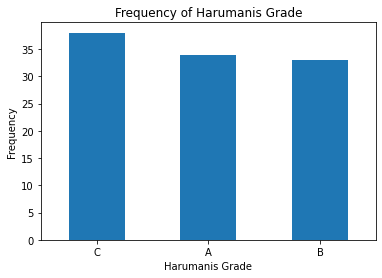

In [14]:
df.Grade.value_counts().plot(kind='bar')
plt.xlabel('Harumanis Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Harumanis Grade')
plt.xticks(rotation=0);

# Outlier detection using boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


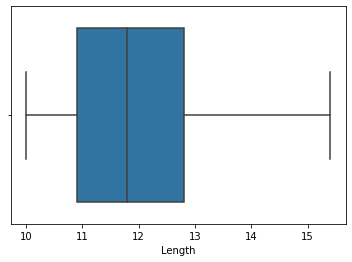

In [15]:
sns.boxplot(df.Length);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Circumference'>

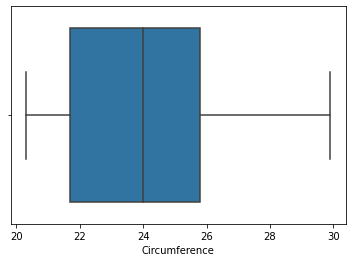

In [16]:
sns.boxplot(df.Circumference)

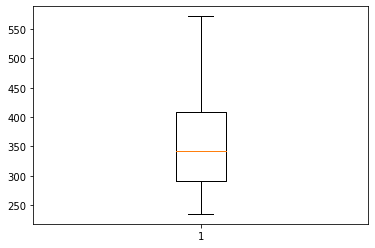

In [17]:
plt.boxplot(df.Weight);

### Correlation analysis

In [18]:
# drop 'No' column as it is unneccessary

df.drop('No',axis=1,inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

for col in df:
    if df[col].dtypes=='object':
        print(f'{col} : {df[col].unique()}')


Grade : ['A' 'B' 'C']


In [20]:
le = LabelEncoder()

for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])
        print(f'{col} : {df[col].unique()}')

Grade : [0 1 2]


In [21]:
# finding correlation

corr_matr = df.corr().round(2)
corr_matr

,Weight,Length,Circumference,Grade
Weight,1.00,0.88,0.94,-0.73
Length,0.88,1.00,0.85,-0.66
Circumference,0.94,0.85,1.00,-0.86
Grade,-0.73,-0.66,-0.86,1.00


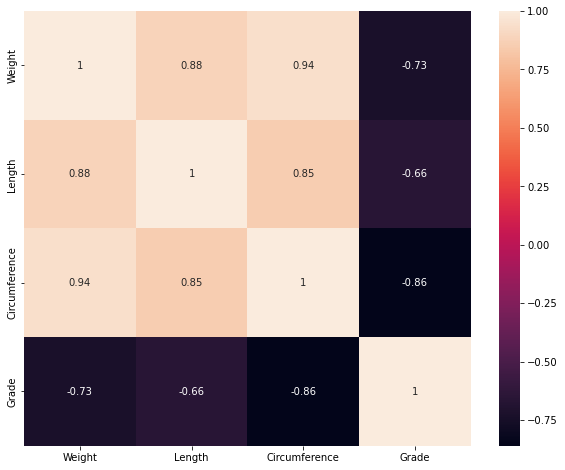

In [22]:
# plotting correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matr,annot=True);

# Modelling

In [23]:
## installing catboost and xgboost

#!pip install catboost

In [24]:
#!pip install xgboost

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier


models = {
    'SVM':SVC(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'CatBoostClassifier':CatBoostClassifier(),
    'XGBClassifier':XGBClassifier(),
    'XGBRFClassifier':XGBRFClassifier(),
}


def fit_and_score(models,X_train,y_train,X_test,y_test):
    
    model_scores = {}
    
    np.random.seed(42)
    
    for name,model in models.items():
        
        model.fit(X_train,y_train)
        
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores

In [26]:
np.random.seed(42)

X = df.drop('Grade',axis=1)
y = df.Grade

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

fit_and_score(models,
             X_train,
             y_train,
             X_test,
             y_test)



Learning rate set to 0.069737
0:	learn: 1.0531291	total: 142ms	remaining: 2m 21s
1:	learn: 1.0127460	total: 143ms	remaining: 1m 11s
2:	learn: 0.9791592	total: 144ms	remaining: 47.9s
3:	learn: 0.9501780	total: 145ms	remaining: 36.1s
4:	learn: 0.9207056	total: 146ms	remaining: 29s
5:	learn: 0.8941036	total: 147ms	remaining: 24.3s
6:	learn: 0.8662752	total: 148ms	remaining: 21s
7:	learn: 0.8420976	total: 149ms	remaining: 18.5s
8:	learn: 0.8179844	total: 149ms	remaining: 16.4s
9:	learn: 0.7988925	total: 150ms	remaining: 14.9s
10:	learn: 0.7770765	total: 151ms	remaining: 13.6s
11:	learn: 0.7592161	total: 152ms	remaining: 12.5s
12:	learn: 0.7451274	total: 153ms	remaining: 11.6s
13:	learn: 0.7284980	total: 154ms	remaining: 10.9s
14:	learn: 0.7123014	total: 155ms	remaining: 10.2s
15:	learn: 0.7007247	total: 156ms	remaining: 9.57s
16:	learn: 0.6877124	total: 157ms	remaining: 9.06s
17:	learn: 0.6734417	total: 157ms	remaining: 8.58s
18:	learn: 0.6623678	total: 158ms	remaining: 8.17s
19:	learn: 0.

222:	learn: 0.0946389	total: 341ms	remaining: 1.19s
223:	learn: 0.0938964	total: 342ms	remaining: 1.19s
224:	learn: 0.0932125	total: 343ms	remaining: 1.18s
225:	learn: 0.0925451	total: 344ms	remaining: 1.18s
226:	learn: 0.0919504	total: 345ms	remaining: 1.17s
227:	learn: 0.0914636	total: 346ms	remaining: 1.17s
228:	learn: 0.0909377	total: 347ms	remaining: 1.17s
229:	learn: 0.0904848	total: 348ms	remaining: 1.16s
230:	learn: 0.0901043	total: 348ms	remaining: 1.16s
231:	learn: 0.0894941	total: 349ms	remaining: 1.16s
232:	learn: 0.0892013	total: 350ms	remaining: 1.15s
233:	learn: 0.0887918	total: 351ms	remaining: 1.15s
234:	learn: 0.0884728	total: 352ms	remaining: 1.15s
235:	learn: 0.0882728	total: 353ms	remaining: 1.14s
236:	learn: 0.0877889	total: 354ms	remaining: 1.14s
237:	learn: 0.0872996	total: 355ms	remaining: 1.14s
238:	learn: 0.0866000	total: 356ms	remaining: 1.13s
239:	learn: 0.0860237	total: 357ms	remaining: 1.13s
240:	learn: 0.0856134	total: 358ms	remaining: 1.13s
241:	learn: 

406:	learn: 0.0454919	total: 509ms	remaining: 741ms
407:	learn: 0.0454034	total: 510ms	remaining: 740ms
408:	learn: 0.0452539	total: 511ms	remaining: 738ms
409:	learn: 0.0451203	total: 511ms	remaining: 736ms
410:	learn: 0.0450072	total: 512ms	remaining: 734ms
411:	learn: 0.0448929	total: 513ms	remaining: 732ms
412:	learn: 0.0446990	total: 514ms	remaining: 730ms
413:	learn: 0.0445853	total: 515ms	remaining: 728ms
414:	learn: 0.0444030	total: 516ms	remaining: 727ms
415:	learn: 0.0442767	total: 517ms	remaining: 725ms
416:	learn: 0.0440520	total: 517ms	remaining: 724ms
417:	learn: 0.0438968	total: 519ms	remaining: 722ms
418:	learn: 0.0438232	total: 520ms	remaining: 720ms
419:	learn: 0.0436893	total: 521ms	remaining: 719ms
420:	learn: 0.0435357	total: 521ms	remaining: 717ms
421:	learn: 0.0434342	total: 522ms	remaining: 716ms
422:	learn: 0.0432353	total: 523ms	remaining: 714ms
423:	learn: 0.0431787	total: 524ms	remaining: 712ms
424:	learn: 0.0430644	total: 525ms	remaining: 711ms
425:	learn: 

591:	learn: 0.0286367	total: 676ms	remaining: 466ms
592:	learn: 0.0285841	total: 678ms	remaining: 465ms
593:	learn: 0.0284955	total: 679ms	remaining: 464ms
594:	learn: 0.0284396	total: 679ms	remaining: 462ms
595:	learn: 0.0283854	total: 680ms	remaining: 461ms
596:	learn: 0.0283162	total: 682ms	remaining: 460ms
597:	learn: 0.0282554	total: 682ms	remaining: 459ms
598:	learn: 0.0281916	total: 683ms	remaining: 458ms
599:	learn: 0.0281281	total: 684ms	remaining: 456ms
600:	learn: 0.0280938	total: 685ms	remaining: 455ms
601:	learn: 0.0280384	total: 686ms	remaining: 454ms
602:	learn: 0.0279995	total: 687ms	remaining: 452ms
603:	learn: 0.0279437	total: 688ms	remaining: 451ms
604:	learn: 0.0278635	total: 689ms	remaining: 450ms
605:	learn: 0.0278204	total: 690ms	remaining: 449ms
606:	learn: 0.0277808	total: 691ms	remaining: 447ms
607:	learn: 0.0277330	total: 692ms	remaining: 446ms
608:	learn: 0.0276935	total: 693ms	remaining: 445ms
609:	learn: 0.0276572	total: 694ms	remaining: 443ms
610:	learn: 

777:	learn: 0.0207425	total: 844ms	remaining: 241ms
778:	learn: 0.0207263	total: 845ms	remaining: 240ms
779:	learn: 0.0206712	total: 846ms	remaining: 239ms
780:	learn: 0.0206339	total: 847ms	remaining: 237ms
781:	learn: 0.0206118	total: 848ms	remaining: 236ms
782:	learn: 0.0205694	total: 849ms	remaining: 235ms
783:	learn: 0.0205433	total: 850ms	remaining: 234ms
784:	learn: 0.0205241	total: 851ms	remaining: 233ms
785:	learn: 0.0204737	total: 851ms	remaining: 232ms
786:	learn: 0.0204480	total: 852ms	remaining: 231ms
787:	learn: 0.0204170	total: 853ms	remaining: 230ms
788:	learn: 0.0203789	total: 854ms	remaining: 228ms
789:	learn: 0.0203590	total: 855ms	remaining: 227ms
790:	learn: 0.0203418	total: 856ms	remaining: 226ms
791:	learn: 0.0203224	total: 857ms	remaining: 225ms
792:	learn: 0.0202863	total: 858ms	remaining: 224ms
793:	learn: 0.0202544	total: 859ms	remaining: 223ms
794:	learn: 0.0202355	total: 860ms	remaining: 222ms
795:	learn: 0.0202081	total: 861ms	remaining: 221ms
796:	learn: 

962:	learn: 0.0162290	total: 1.01s	remaining: 38.9ms
963:	learn: 0.0162025	total: 1.01s	remaining: 37.8ms
964:	learn: 0.0161770	total: 1.01s	remaining: 36.8ms
965:	learn: 0.0161679	total: 1.01s	remaining: 35.7ms
966:	learn: 0.0161441	total: 1.01s	remaining: 34.6ms
967:	learn: 0.0161211	total: 1.02s	remaining: 33.6ms
968:	learn: 0.0161004	total: 1.02s	remaining: 32.5ms
969:	learn: 0.0160849	total: 1.02s	remaining: 31.5ms
970:	learn: 0.0160682	total: 1.02s	remaining: 30.4ms
971:	learn: 0.0160521	total: 1.02s	remaining: 29.4ms
972:	learn: 0.0160365	total: 1.02s	remaining: 28.3ms
973:	learn: 0.0160240	total: 1.02s	remaining: 27.3ms
974:	learn: 0.0159995	total: 1.02s	remaining: 26.2ms
975:	learn: 0.0159773	total: 1.02s	remaining: 25.2ms
976:	learn: 0.0159628	total: 1.02s	remaining: 24.1ms
977:	learn: 0.0159440	total: 1.02s	remaining: 23.1ms
978:	learn: 0.0159209	total: 1.03s	remaining: 22ms
979:	learn: 0.0159103	total: 1.03s	remaining: 21ms
980:	learn: 0.0158985	total: 1.03s	remaining: 19.9

{'SVM': 0.5714285714285714,
 'KNN': 0.7142857142857143,
 'RandomForest': 0.8571428571428571,
 'CatBoostClassifier': 0.8095238095238095,
 'XGBClassifier': 0.7619047619047619,
 'XGBRFClassifier': 0.7619047619047619}

Random Forest has the highest score, hence RF is selected to be fine tuning

In [27]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
%%time
# Fine tuning using GridSearchCV across 5-fold validation

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}



gs_model = GridSearchCV(estimator=RandomForestClassifier(),
                        cv=5,
                        param_grid=param_grid,
                        verbose=3)

gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END boots

[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.882 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.765 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.706 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.765 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.875 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.941 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_sa

[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.765 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.882 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.647 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.706 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_sa

[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.706 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.647 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.882 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.706 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, 

[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.941 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.765 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.875 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.941 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, 

[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.882 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.706 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.824 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.706 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.875 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, 

[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.647 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.824 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.706 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.941 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.882 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.765 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.875 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.941 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, 

[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.941 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.706 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.875 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, 

[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.706 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.824 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.706 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.765 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.706 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt,

[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.812 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.824 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.812 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt,

[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.765 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.706 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.882 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.824 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=None, max_features

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.941 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.647 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.941 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.750 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.882 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.706 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.750 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.824 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.706 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.882 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.824 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.941 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.882 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.765 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.875 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.812 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.882 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.765 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.812 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_l

[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.765 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.706 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.875 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.882 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.647 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.824 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

C:\Users\ASUS ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 638, in _validate_params

CPU times: total: 2min 11s
Wall time: 2min 39s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [29]:
gs_model.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [30]:
gs_model.score(X_test,y_test)

0.8571428571428571

In [31]:
gs_model.score(X_train,y_train)

1.0

### Classification Report

In [32]:
from sklearn.metrics import classification_report,confusion_matrix


y_preds = gs_model.predict(X_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.75      0.60      0.67         5
           2       0.78      1.00      0.88         7

    accuracy                           0.86        21
   macro avg       0.84      0.83      0.83        21
weighted avg       0.87      0.86      0.85        21



### Confusion Matrix

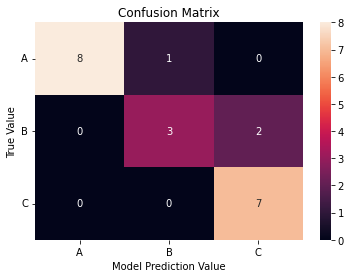

In [33]:
labels = ['A', 'B', 'C']

conf_matrix = confusion_matrix(y_test, y_preds)

# Create the heatmap
sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels)

# Set plot title
plt.title('Confusion Matrix')

# Set ytick labels
plt.yticks(rotation=0)  # Rotate ytick labels to be horizontal

plt.xlabel('Model Prediction Value')
plt.ylabel('True Value')

# Display the plot
plt.show()

### Cross validation score

In [34]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

cv_acc=np.mean(cross_val_score(model,X,y,cv=5,scoring=None))

cv_f1=np.mean(cross_val_score(model,X,y,cv=5,scoring='f1_macro')) #

cv_recall=np.mean(cross_val_score(model,X,y,cv=5,scoring='recall_macro'))

cv_precision=np.mean(cross_val_score(model,X,y,cv=5,scoring='precision_macro'))

scores = {
    'Accuracy':cv_acc,
    'F1':cv_f1,
    'Recall':cv_recall,
    'Precision':cv_precision,
}

In [35]:
score = pd.DataFrame(scores,index=['Value'])
score

,Accuracy,F1,Recall,Precision
Value,0.8,0.80205,0.795238,0.834048


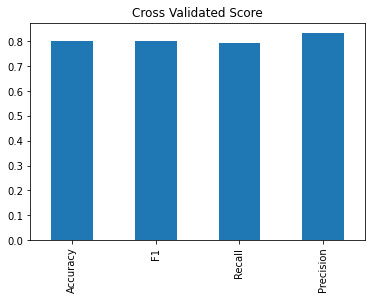

In [36]:
score.T.plot.bar(legend=False)
plt.title('Cross Validated Score');

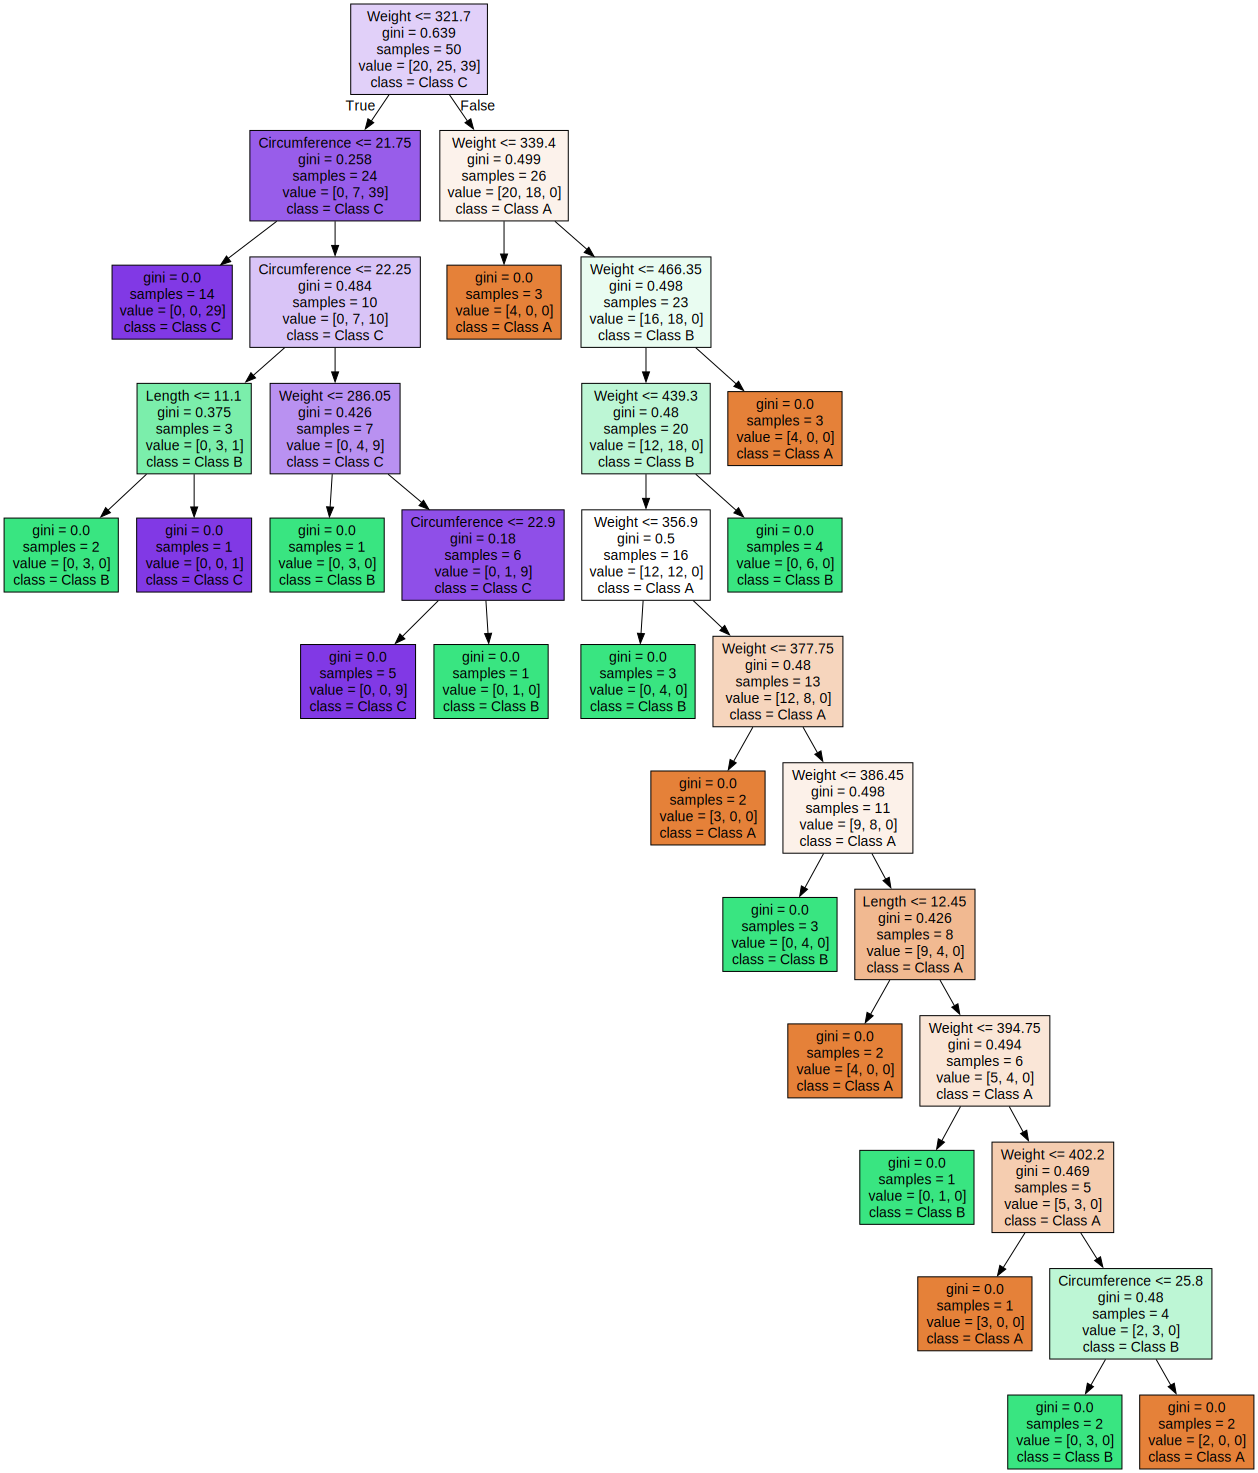

In [37]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Get the first decision tree
tree = clf.estimators_[0]

# Export the decision tree to Graphviz format
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['Class A', 'Class B','Class C'], filled=True)

# Convert the Graphviz data to a Graph object
graph = graphviz.Source(dot_data)

# Display the decision tree in the Jupyter Notebook
graph


In [38]:
# save into jpg file
graph.render(filename='decision_tree for Harumanis Mango',format='jpg')

'decision_tree for Harumanis Mango.jpg'

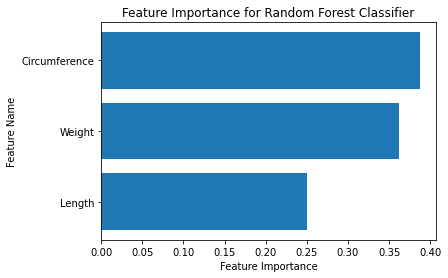

In [39]:
feature_importance = clf.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

# Create a horizontal bar plot
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()


In [40]:
from joblib import dump, load

#save model

dump(clf,'rf_model.joblib')

['rf_model.joblib']

In [41]:
load_model = load('rf_model.joblib')

load_model.score(X_test,y_test)

0.8095238095238095

In [42]:
clf.feature_names_in_

array(['Weight', 'Length', 'Circumference'], dtype=object)

In [43]:
import pickle
pickle.dump(clf,open('rf_model.pkl','wb'))
